<a href="https://colab.research.google.com/github/DinAnsh/store_sales_prediction/blob/main/Store_Sales_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing libraries and reading of train data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
real_df = pd.read_csv('/content/drive/MyDrive/Projects/SSP/Train.csv')
df = real_df.copy()
display(df.info(), df.head(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.shape, df.dropna().shape

((8523, 12), (4650, 12))

In [6]:
#check which column contain null values and count of them
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## handling null values

- Item_Weight & Outlet_Size Columns Contain null values 

In [7]:
# item_weight is depending upon item_type

d1 = df.groupby('Item_Type').mean()
d1 = dict(zip(d1.index.to_list(), d1['Item_Weight'].to_list()))

null_df1 = df[df['Item_Weight'].isna()==True]
#display(null_df1)

itm_wt = []
for typ in null_df1['Item_Type']:
    itm_wt += [d1[typ]]

c=0
for i in null_df1.index:
    df.loc[i, 'Item_Weight'] = itm_wt[c]
    c+=1

display(df)


#df['Item_Weight'].isna().to_list().count(True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
df.groupby(by=['Outlet_Type','Outlet_Size','Outlet_Location_Type']).count()

Item_Identifier  ...  Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Location_Type                   ...                   
Grocery Store     Small       Tier 1                            528  ...                528
Supermarket Type1 High        Tier 3                            932  ...                932
                  Medium      Tier 1                            930  ...                930
                  Small       Tier 1                            930  ...                930
                              Tier 2                            930  ...                930
Supermarket Type2 Medium      Tier 3                            928  ...                928
Supermarket Type3 Medium      Tier 3                            935  ...                935

[7 rows x 9 columns]

In [9]:
# Outlet_Size is depending upon Outlet_type

null_df2 = df[df['Outlet_Size'].isna()==True]

null_df2[null_df2['Outlet_Type']=='Supermarket Type1']

df[df['Outlet_Location_Type']=='Tier 3']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [10]:
#size_na - it is a datafram containing rows where Outlet_Size is null
size_na = df[df.Outlet_Size.isna()]
size_na.Outlet_Type.unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [11]:
g2 = df.groupby(["Outlet_Type","Outlet_Size","Outlet_Location_Type"]).count()
g2

Item_Identifier  ...  Item_Outlet_Sales
Outlet_Type       Outlet_Size Outlet_Location_Type                   ...                   
Grocery Store     Small       Tier 1                            528  ...                528
Supermarket Type1 High        Tier 3                            932  ...                932
                  Medium      Tier 1                            930  ...                930
                  Small       Tier 1                            930  ...                930
                              Tier 2                            930  ...                930
Supermarket Type2 Medium      Tier 3                            928  ...                928
Supermarket Type3 Medium      Tier 3                            935  ...                935

[7 rows x 9 columns]

In [12]:
size_na[size_na.Outlet_Type=="Supermarket Type1"].Outlet_Location_Type.unique()

array(['Tier 2'], dtype=object)

- Outlet_Size is NaN for only location_type is Tier2 or outlet_type is 'Grocery Store', so for both Grocery Store and tier 2 Outlet Size sholud be "small" according to g2


In [13]:
#Fill missing values of Outlet_size
df.Outlet_Size.fillna("Small",inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outlier Detection

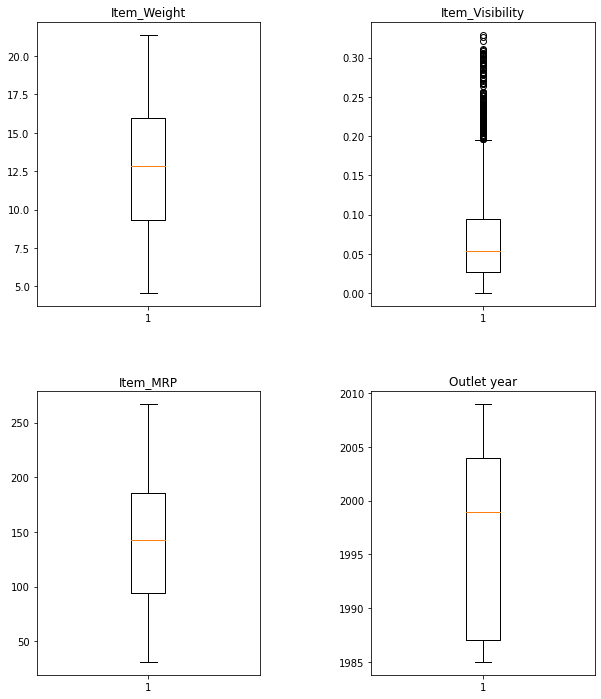

In [43]:
%matplotlib inline
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
plt.boxplot(df.Item_Weight)#,sym="",notch=1,whiskerprops={"linestyle":"-","color":"black"},showmeans=True,meanline=True,meanprops={"color":"black"})
plt.title("Item_Weight")

plt.subplot(2,2,2)
plt.boxplot(df.Item_Visibility)#,sym="",notch=1,whiskerprops={"linestyle":"-","color":"black"},showmeans=True,meanline=True,meanprops={"color":"black"})
plt.title("Item_Visibility")

plt.subplot(2,2,3)
plt.boxplot(df.Item_MRP)#,sym="",notch=1,whiskerprops={"linestyle":"-","color":"black"},showmeans=True,meanline=True,meanprops={"color":"black"})
plt.title("Item_MRP")

plt.subplot(2,2,4)
plt.boxplot(df.Outlet_Establishment_Year)#,sym="",notch=1,whiskerprops={"linestyle":"-","color":"black"},showmeans=True,meanline=True,meanprops={"color":"black"})
plt.title("Outlet year")

plt.subplots_adjust(wspace=0.5,hspace=0.3)

plt.show()

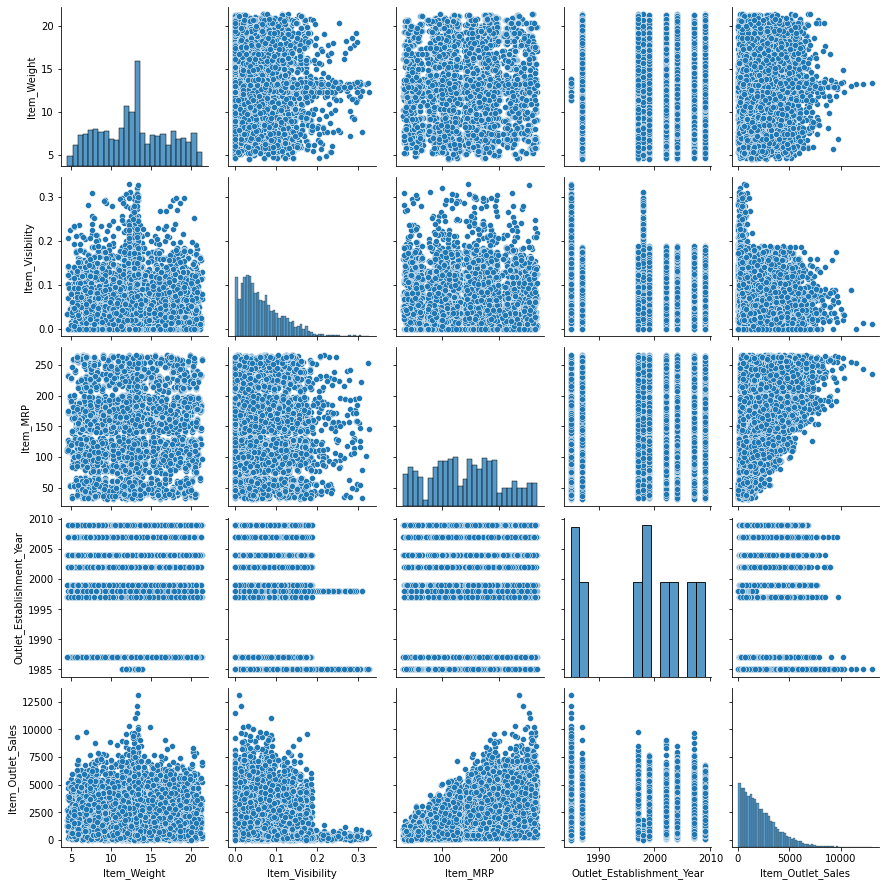

In [44]:
sns.pairplot(df);

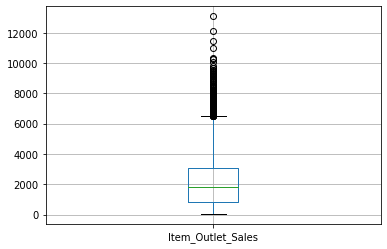

In [45]:
df.boxplot("Item_Outlet_Sales");

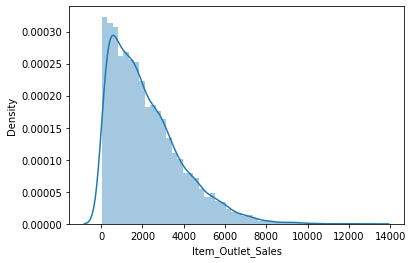

In [46]:
#Item Outlet Sales id right Skewed
sns.distplot(df.Item_Outlet_Sales)

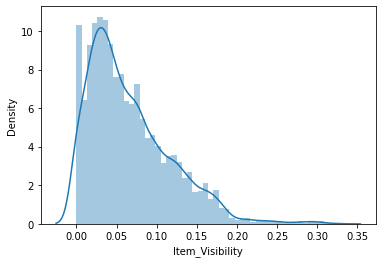

In [47]:
#Item_Visibility is also Right skewed
sns.distplot(df.Item_Visibility,kde=True);

- ref - https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [48]:
import scipy.stats as stat
import pylab

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(df[feature])
    plt.subplot(1,2,2)
    stat.probplot(df[feature], plot=pylab)
    plt.show()

for1/1 
mean - 2181.2889135750365	std - 1706.499615733832
Skewness -  1.1773233539676373


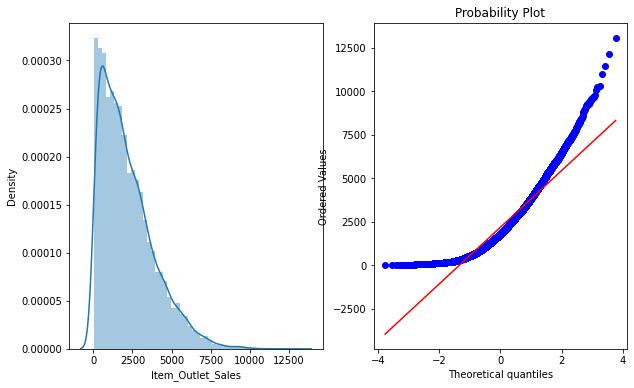

-----------------------------------------------------------------------------
for1/2 
mean - 42.944776951131956	std - 18.359591362903707
Skewness -  0.23463468979850136


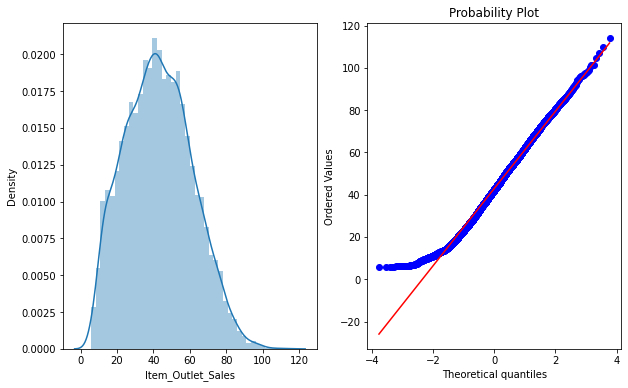

-----------------------------------------------------------------------------
for1/3 
mean - 11.991839823708082	std - 3.5819347326865376
Skewness -  -0.1024889558309614


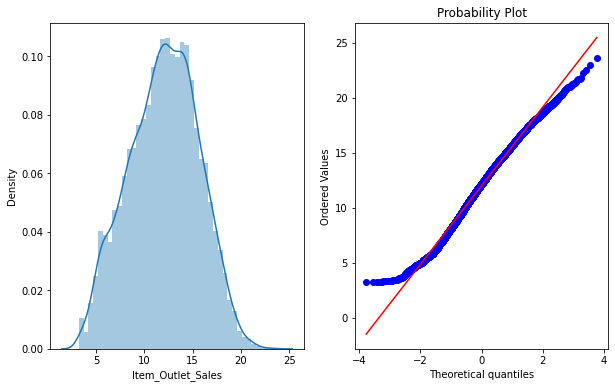

-----------------------------------------------------------------------------
for1/4 
mean - 6.386168633716639	std - 1.4703335626407013
Skewness -  -0.28175872535888447


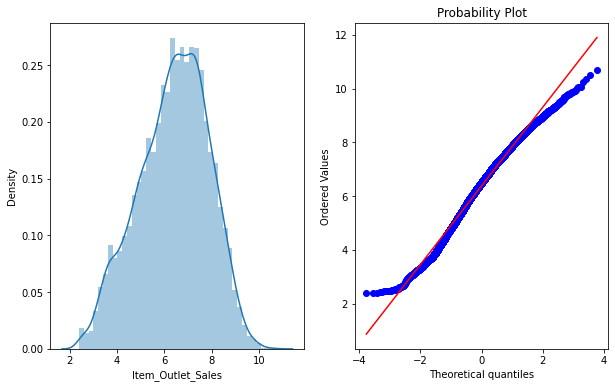

-----------------------------------------------------------------------------
for1/5 
mean - 4.387649701496285	std - 0.8226326610563368
Skewness -  -0.3938484256222606


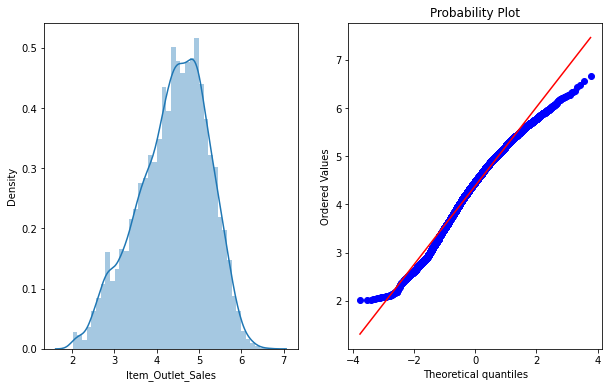

-----------------------------------------------------------------------------
for1/6 
mean - 3.4203965485870658	std - 0.5410745084735148
Skewness -  -0.4707555438637913


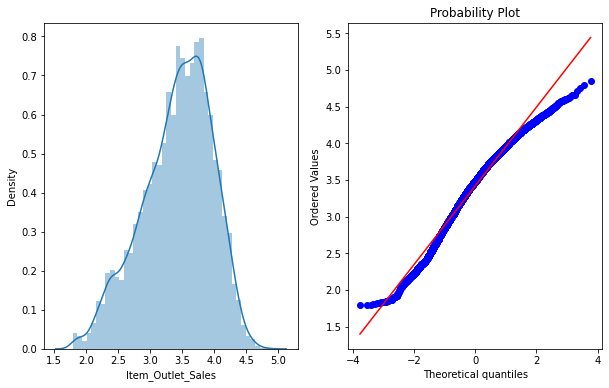

-----------------------------------------------------------------------------
for1/7 
mean - 2.86473280799901	std - 0.3920039607975069
Skewness -  -0.5268579495516648


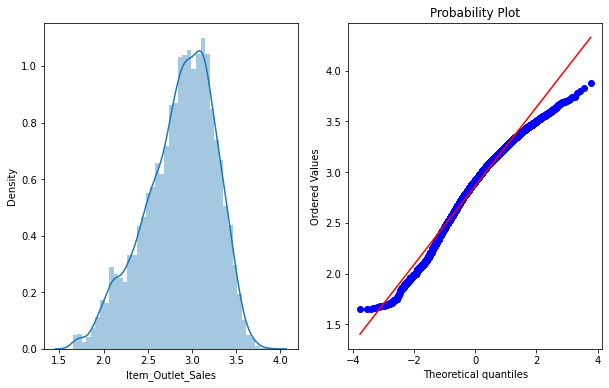

-----------------------------------------------------------------------------
for1/8 
mean - 2.5089167643917794	std - 0.3025161823919191
Skewness -  -0.5696146294208946


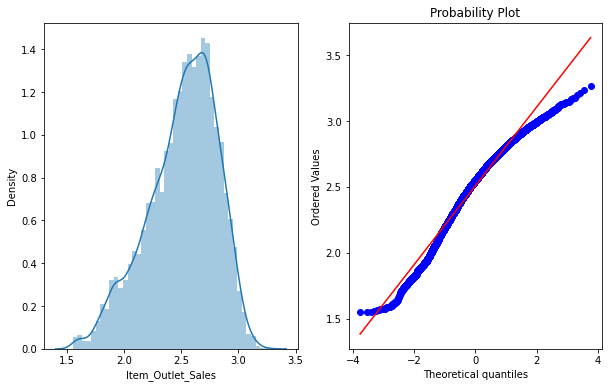

-----------------------------------------------------------------------------
for1/9 
mean - 2.263477335018657	std - 0.24394818029149726
Skewness -  -0.6032912921930095


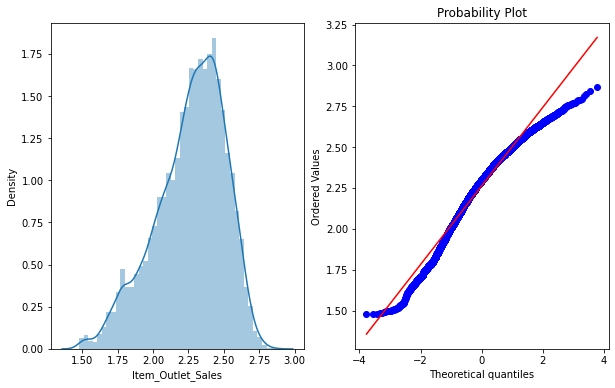

-----------------------------------------------------------------------------


In [49]:
#1/4 is good
for i in range(1,10):
    df1 = df.copy()
    df1['Item_Outlet_Sales']=df1.Item_Outlet_Sales**(1/i)
    print(f"for1/{i} \nmean - {df1.Item_Outlet_Sales.mean()}\tstd - {df1.Item_Outlet_Sales.std()}")
    print("Skewness - ",stat.skew(df1.Item_Outlet_Sales))
    plot_data(df1,"Item_Outlet_Sales")
    print("-----------------------------------------------------------------------------")

for1/1 
mean - 0.06613202877895127	std - 0.051597822321135196
Skewness -  1.16688513828559


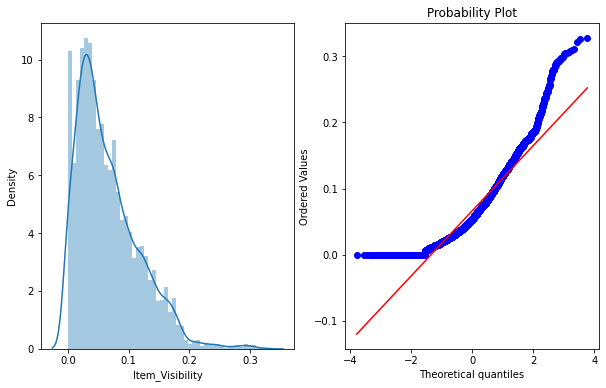

-----------------------------------------------------------------------------
for1/2 
mean - 0.23370912853518178	std - 0.10730061921226015
Skewness -  -0.09803828864382132


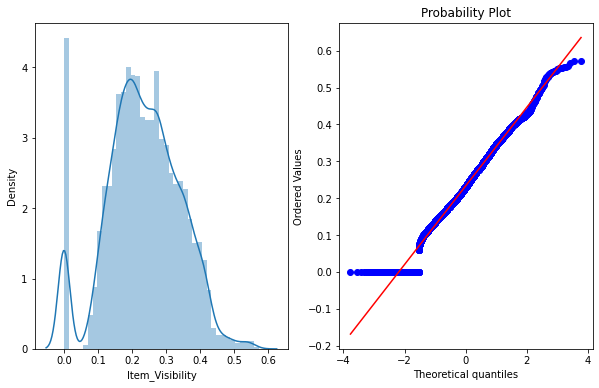

-----------------------------------------------------------------------------
for1/3 
mean - 0.36571591118090885	std - 0.13317019071421857
Skewness -  -0.9472269964784773


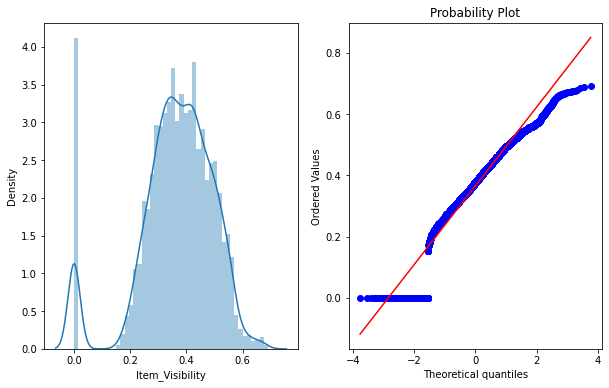

-----------------------------------------------------------------------------
for1/4 
mean - 0.4600713367214486	std - 0.1484792252129522
Skewness -  -1.601657970224475


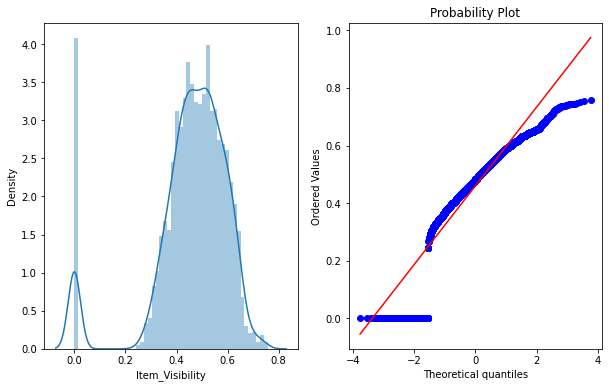

-----------------------------------------------------------------------------
for1/5 
mean - 0.5289928085654164	std - 0.15929003638934894
Skewness -  -2.082487676704616


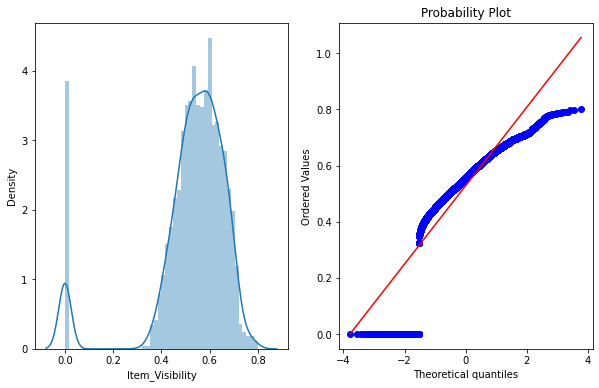

-----------------------------------------------------------------------------
for1/6 
mean - 0.5810501126122349	std - 0.16763047089482702
Skewness -  -2.4293654882268356


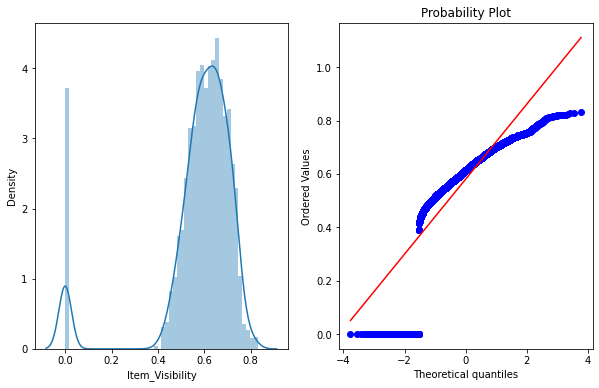

-----------------------------------------------------------------------------
for1/7 
mean - 0.6215887118137916	std - 0.17436561129235417
Skewness -  -2.680792876258019


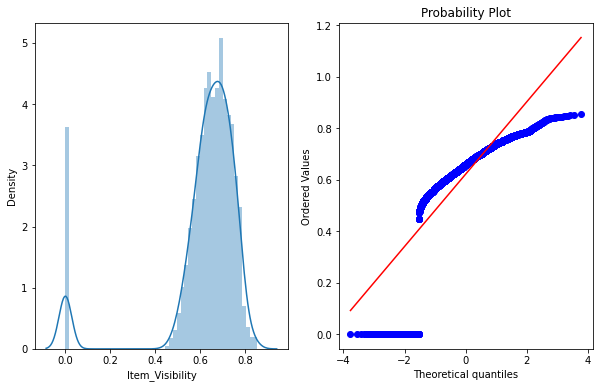

-----------------------------------------------------------------------------
for1/8 
mean - 0.6539815566163214	std - 0.17995349355146276
Skewness -  -2.8657863368132706


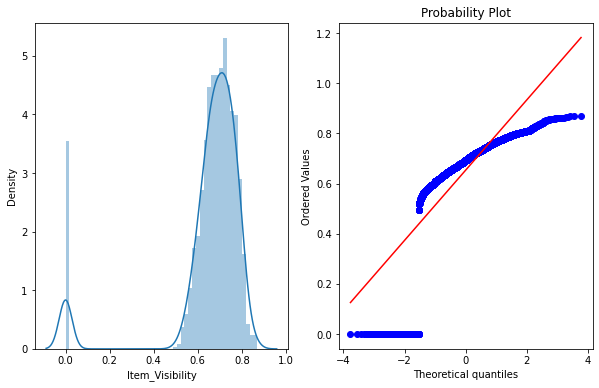

-----------------------------------------------------------------------------
for1/9 
mean - 0.6804276526231224	std - 0.18467578391486186
Skewness -  -3.004434786207786


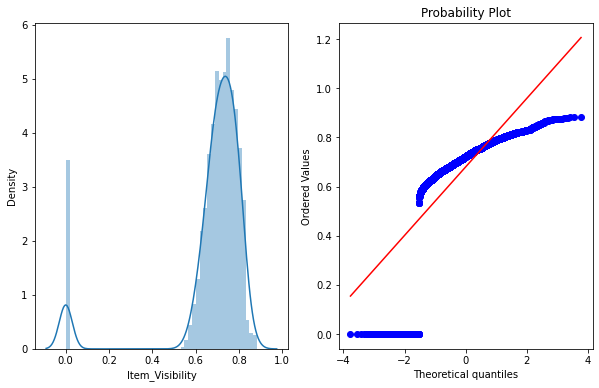

-----------------------------------------------------------------------------


In [50]:
#1/2 is good
for i in range(1,10):
    df1 = df.copy()
    df1['Item_Visibility']=df1.Item_Visibility**(1/i)
    print(f"for1/{i} \nmean - {df1.Item_Visibility.mean()}\tstd - {df1.Item_Visibility.std()}")
    print("Skewness - ",stat.skew(df1.Item_Visibility))
    plot_data(df1,"Item_Visibility")
    print("-----------------------------------------------------------------------------")

for1/4 
mean - 6.386168633716639	std - 1.4703335626407013


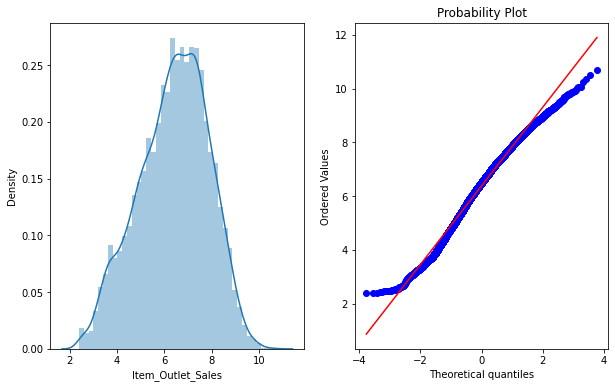

In [51]:
df1 = df.copy()
df1['Item_Outlet_Sales']=df1.Item_Outlet_Sales**(1/4)
print(f"for1/{4} \nmean - {df1.Item_Outlet_Sales.mean()}\tstd - {df1.Item_Outlet_Sales.std()}")
plot_data(df1,"Item_Outlet_Sales")

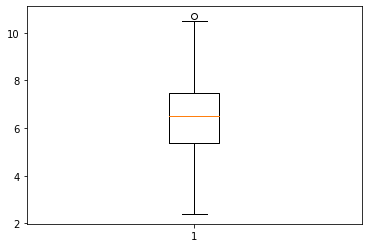

In [52]:
plt.boxplot(df1["Item_Outlet_Sales"]);

In [53]:
#To check number of outliers in Item_Outlet_Sales
Q1,Q3= np.percentile(df1.Item_Outlet_Sales , [25,75])
IQR = Q3 - Q1

upper_range =  Q3 + (1.5*IQR)
lower_range = Q1 - (1.5*IQR)
outliers = df1[(df1.Item_Outlet_Sales<lower_range) | (df1.Item_Outlet_Sales>upper_range)]
len(outliers)

1

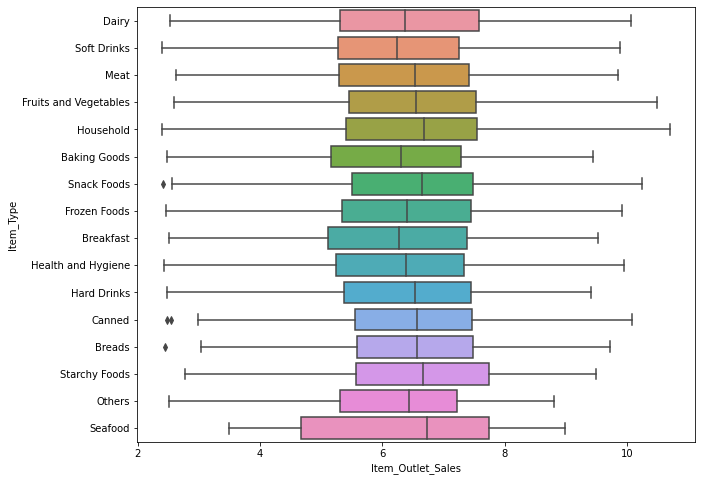

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df1,x="Item_Outlet_Sales",y="Item_Type")
plt.show()

for1/2 
mean - 0.23370912853518178	std - 0.10730061921226015


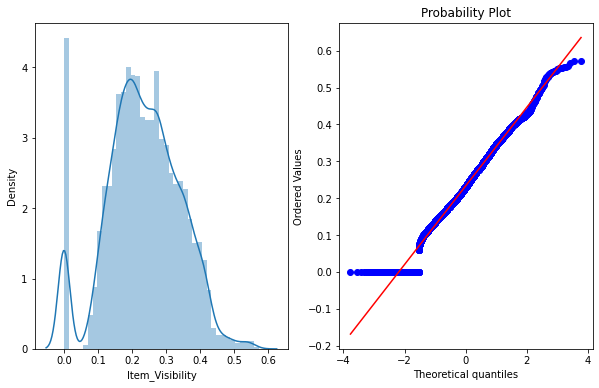

In [55]:
#Square Root Transformation
df1['Item_Visibility']=df1.Item_Visibility**(1/2)
print(f"for1/{2} \nmean - {df1.Item_Visibility.mean()}\tstd - {df1.Item_Visibility.std()}")
plot_data(df1,"Item_Visibility")

In [56]:
#To check number of outliers in Item_Visibiltiy
Q1,Q3= np.percentile(df1.Item_Visibility , [25,75])
IQR = Q3 - Q1

upper_range =  Q3 + (1.5*IQR)
lower_range = Q1 - (1.5*IQR)
outliers = df1[(df1.Item_Visibility<lower_range) | (df1.Item_Visibility>upper_range)]
len(outliers)

40

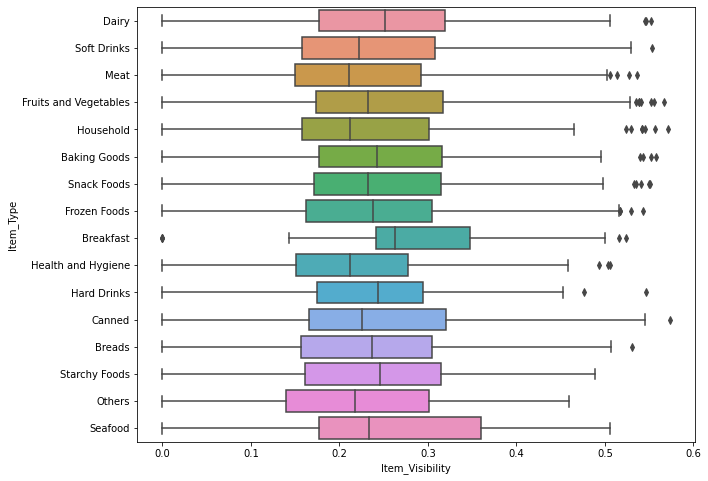

In [57]:
plt.figure(figsize=(10,8))
sns.boxplot(df1["Item_Visibility"],df1["Item_Type"]);

In [58]:
#To remove outliers
Items = df1.Item_Type.unique()
for i in Items:
    while (True):
        item = df1[df1.Item_Type==i]

        Q1,Q3= np.percentile(item.Item_Visibility , [25,75])
        # Q1 = item.Item_Visibility.quantile(0.25)
        IQR = Q3 - Q1
        upper_range =  Q3 + (1.5*IQR)
        lower_range = Q1 - (1.5*IQR)
        outliers = item[(item.Item_Visibility>upper_range)|(item.Item_Visibility<lower_range)]
        o=len(outliers)
        if(o>0):
            df1.drop(index=outliers.index,axis=0,inplace=True)
        else:
            break;

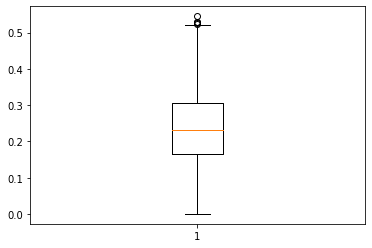

In [59]:
plt.boxplot(df1["Item_Visibility"]);

In [60]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8473.000000,8473.000000,8473.000000,8473.000000,8473.000000
mean,12.857859,0.232125,141.016042,1997.868288,6.398251
std,4.239266,0.105147,62.305067,8.364434,1.464448
min,4.555000,0.000000,31.290000,1985.000000,2.402030
25%,9.300000,0.164118,93.780400,1987.000000,5.400931
50%,12.867061,0.231483,143.012800,1999.000000,6.520463
75%,16.000000,0.306453,185.755600,2004.000000,7.465327
max,21.350000,0.545264,266.888400,2009.000000,10.695713


## Extracting some useful information

- Which Item has max sales 
- Which Outlet has max sales?
- The oldest Outlet & location_type?

In [33]:
#Top 5 Highest Item_Outlet_Sales
df1.iloc[df1.Item_Outlet_Sales.nlargest(keep='all').index, 7:]

,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7229,1985,Medium,Tier 3,Supermarket Type3,7.881666
5254,1987,High,Tier 3,Supermarket Type1,7.940165
1457,2007,Small,Tier 2,Supermarket Type1,7.291307
4373,1998,Small,Tier 3,Grocery Store,3.734063
6579,1998,Small,Tier 3,Grocery Store,4.514733


In [34]:
df1[df1.Outlet_Establishment_Year == df1.Outlet_Establishment_Year.min()].Item_Outlet_Sales.max()

10.695712819360516

- So the Oldest Outlet_Establishment_year is 1985 which has the maximum item sales of 13086

In [35]:
# 5 lowest Item_Outlet_Sales
df1.iloc[df1.Item_Outlet_Sales.nsmallest(), 7:]

,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,1999,Medium,Tier 1,Supermarket Type1,6.767271
2,1999,Medium,Tier 1,Supermarket Type1,6.767271
2,1999,Medium,Tier 1,Supermarket Type1,6.767271
2,1999,Medium,Tier 1,Supermarket Type1,6.767271
2,1999,Medium,Tier 1,Supermarket Type1,6.767271


### Label Encoding  - For ordinal data

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
df1["Item_Fat_Content"] = le.fit_transform(df1.Item_Fat_Content)
# data["Item_Type_en"] = le.fit_transform(data.Item_Type)
df1["Outlet_Size"] = le.fit_transform(df1.Outlet_Size)
df1["Outlet_Location_Type"] = le.fit_transform(df1.Outlet_Location_Type)
df1["Outlet_Type"] = le.fit_transform(df1.Outlet_Type)
df1["Item_Identifier"] = le.fit_transform(df1.Item_Identifier)
df1["Item_Type"] = le.fit_transform(df1.Item_Type)
df1["Outlet_Identifier"] = le.fit_transform(df1.Outlet_Identifier)

### - feature selection 

In [38]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

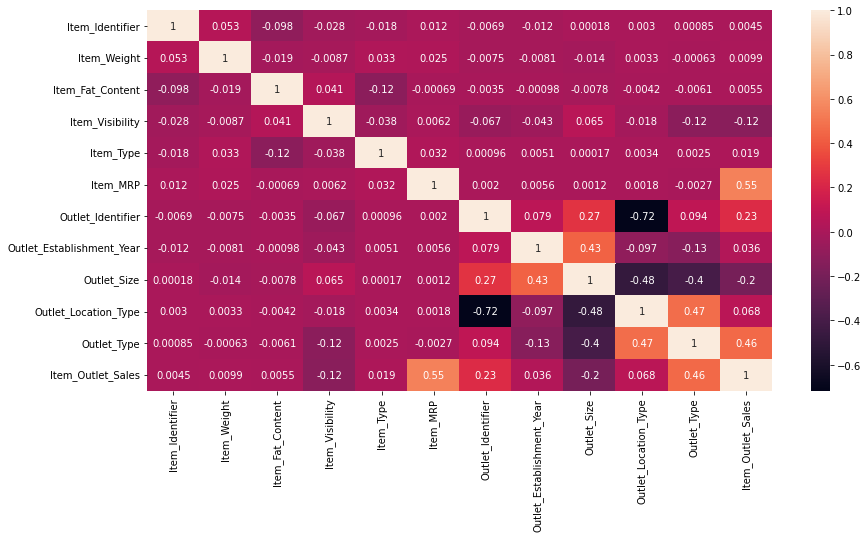

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(df1.corr(),annot=True)

In [40]:
#can be deleted
# Item_Identifier,Item_Fat_Content,Item_Weight,Item_Type,Outlet_Location_Type,Outlet_Establishment_Year,Outlet_Identifier
df1.drop(["Item_Identifier","Item_Fat_Content","Item_Weight","Item_Visibility","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Establishment_Year"],axis=1,inplace=True)

In [41]:
df1.head()

,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,249.8092,9,1,7.817658
1,48.2692,3,2,4.588857
2,141.6180,9,1,6.767271
3,182.0950,0,0,5.202165
4,53.8614,1,1,5.615955


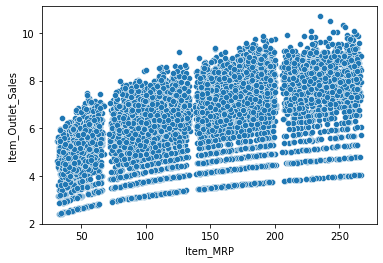

In [42]:
sns.scatterplot(df1["Item_MRP"],df1["Item_Outlet_Sales"])

## Split the dataset into dependent and independent feature

In [62]:
X = df1.drop("Item_Outlet_Sales",axis=1)
y = df1["Item_Outlet_Sales"]

In [63]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [64]:
y.head()

0    7.817658
1    4.588857
2    6.767271
3    5.202165
4    5.615955
Name: Item_Outlet_Sales, dtype: float64

In [65]:
X = X.values
y = y.values

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [67]:
len(X_train), len(X_test)

(6354, 2119)